In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\train.csv')
df_test=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\test.csv')
df_trainlabel=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\train_label.csv', header=None)
df_testlabel=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\test_label.csv', header=None)

In [3]:
import pandas as pd
import datetime
#,parse_dates=[0],index_col='DateTime'
df_train=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\train.csv')
df_train['bookings']=df_trainlabel.iloc[:,0].values
df_train['datetime']=df_train['datetime'].astype(str)
df_train['datetime']=pd.to_datetime(df_train['datetime'],infer_datetime_format=True)
df_train=df_train.sort_values(by='datetime')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['season']=le.fit_transform(df_train['season'])
df_train['weather']=le.fit_transform(df_train['weather'])

print(df_train.shape)
df_train.head()

(8708, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,bookings
7397,2011-01-01 00:00:00,1,0,0,0,9.84,14.395,81,0.0000,16
7699,2011-01-01 01:00:00,1,0,0,0,9.02,13.635,80,0.0000,40
7785,2011-01-01 03:00:00,1,0,0,0,9.84,14.395,75,0.0000,13
5760,2011-01-01 05:00:00,1,0,0,3,9.84,12.880,75,6.0032,1
1826,2011-01-01 06:00:00,1,0,0,0,9.02,13.635,80,0.0000,2


In [4]:
df_test=pd.read_csv(r'C:\Users\hp\Desktop\edureka\live session notes(given)\midterm_project1\Dataset\test.csv')
df_test['bookings']=df_testlabel.iloc[:,0].values
df_test['datetime']=df_test['datetime'].astype(str)
df_test['datetime']=pd.to_datetime(df_test['datetime'],infer_datetime_format=True)
df_test=df_test.sort_values(by='datetime')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['season']=le.fit_transform(df_test['season'])
df_test['weather']=le.fit_transform(df_test['weather'])

print(df_test.shape)
df_test.head()

(2178, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,bookings
1517,2011-01-01 02:00:00,1,0,0,0,9.02,13.635,80,0.0000,32
987,2011-01-01 04:00:00,1,0,0,0,9.84,14.395,75,0.0000,1
1782,2011-01-01 08:00:00,1,0,0,0,9.84,14.395,75,0.0000,8
179,2011-01-01 21:00:00,1,0,0,2,16.40,20.455,87,12.9980,34
1232,2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,17


In [5]:
le.classes_

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy '], dtype=object)

In [6]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,bookings
7397,2011-01-01 00:00:00,1,0,0,0,9.84,14.395,81,0.0000,16
7699,2011-01-01 01:00:00,1,0,0,0,9.02,13.635,80,0.0000,40
7785,2011-01-01 03:00:00,1,0,0,0,9.84,14.395,75,0.0000,13
5760,2011-01-01 05:00:00,1,0,0,3,9.84,12.880,75,6.0032,1
1826,2011-01-01 06:00:00,1,0,0,0,9.02,13.635,80,0.0000,2


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 7397 to 4486
Data columns (total 10 columns):
datetime      8708 non-null datetime64[ns]
season        8708 non-null int32
holiday       8708 non-null int64
workingday    8708 non-null int64
weather       8708 non-null int32
temp          8708 non-null float64
atemp         8708 non-null float64
humidity      8708 non-null int64
windspeed     8708 non-null float64
bookings      8708 non-null int64
dtypes: datetime64[ns](1), float64(3), int32(2), int64(4)
memory usage: 680.3 KB


In [8]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
bookings       797
dtype: int64

## Data Visualization

**Distribution Plot of 'Cab Bookings' Column**

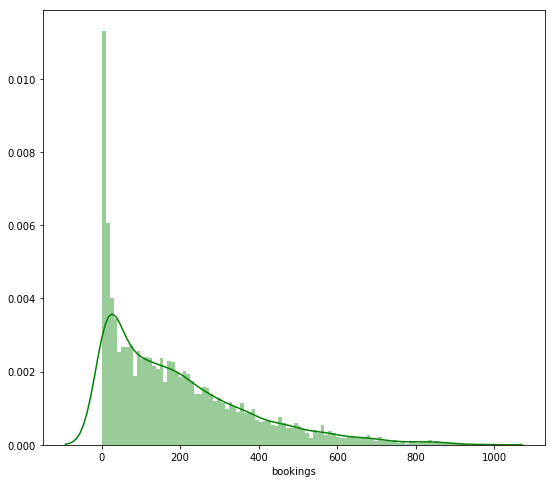

In [9]:
plt.figure(figsize=(9, 8))
sns.distplot(df_train['bookings'], color='g', bins=100);

In [10]:
df_train.describe()['bookings']

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: bookings, dtype: float64

**Histogram plot of every feature in Train data**

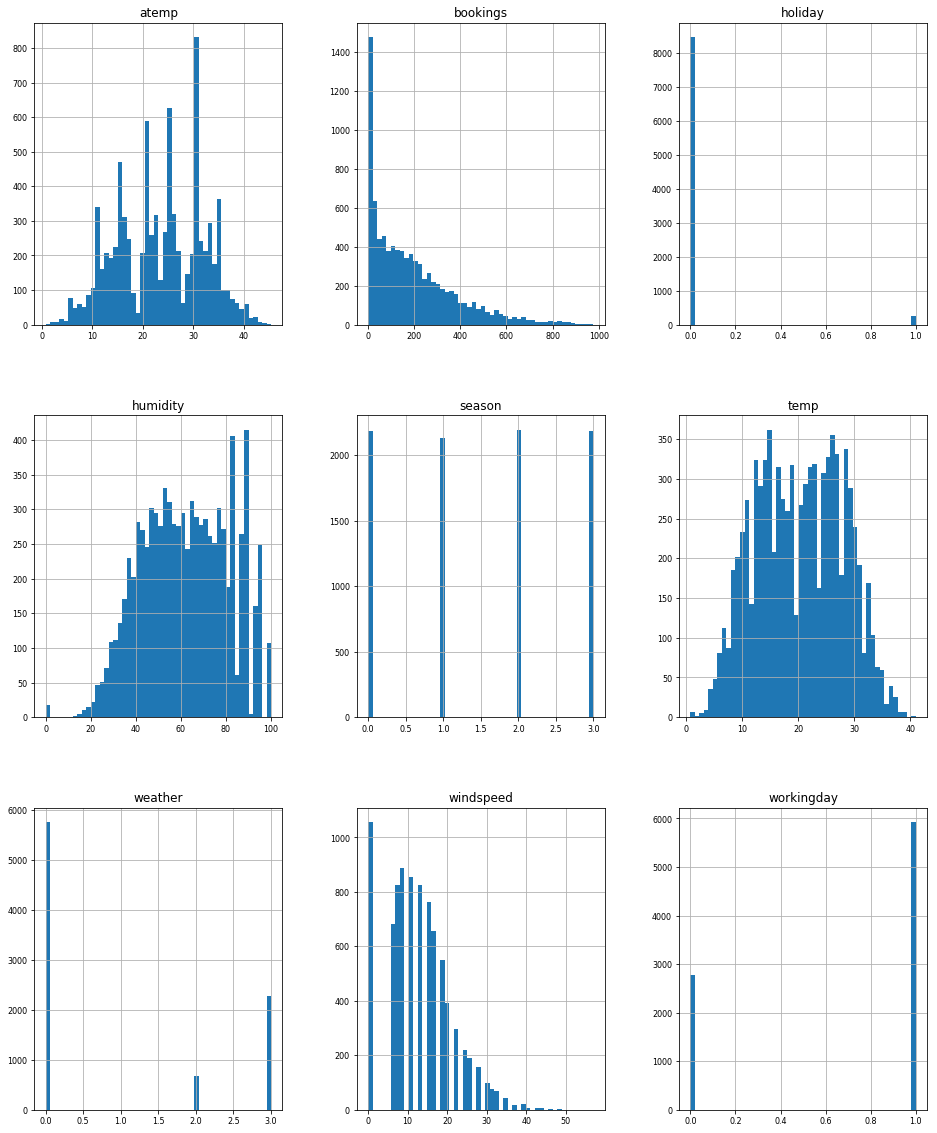

In [11]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

**observatiosns:**
   * The column like windspeed that has somewhat similar distribution with Bookings.

defaultdict(<class 'float'>, {2011: 621243.0, 2012: 1059462.0})


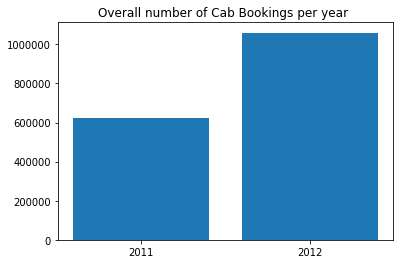

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt

yearly_total_bookings=defaultdict(float)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][9]
    # Add the total number of bookings to the current value for the year
    yearly_total_bookings[dates.year] += num_bookings

# Print yearly_total_bookings
print(yearly_total_bookings)

# Visualize aggregated data
plt.bar(range(len(yearly_total_bookings)), list(yearly_total_bookings.values()), align='center')
plt.xticks(range(len(yearly_total_bookings)), list(yearly_total_bookings.keys()))
plt.title("Overall number of Cab Bookings per year ")
plt.show()

defaultdict(<class 'float'>, {1: 83268.0, 2: 83911.0, 3: 88755.0, 4: 89366.0, 5: 87773.0, 6: 86512.0, 7: 85538.0, 8: 83630.0, 9: 91240.0, 10: 89754.0, 11: 88784.0, 12: 81878.0, 13: 89840.0, 14: 93887.0, 15: 93583.0, 16: 89998.0, 17: 92088.0, 18: 88642.0, 19: 92258.0})


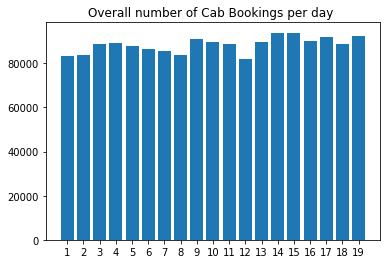

In [13]:
from collections import defaultdict
import matplotlib.pyplot as plt

daily_total_bookings=defaultdict(float)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][9]
    # Add the total number of bookings to the current value for the day
    daily_total_bookings[dates.day] += num_bookings

# Print daily_total_bookings
print(daily_total_bookings)

# Visualize aggregated data
plt.bar(range(len(daily_total_bookings)), list(daily_total_bookings.values()), align='center')
plt.xticks(range(len(daily_total_bookings)), list(sorted(daily_total_bookings.keys())))
plt.title("Overall number of Cab Bookings per day ")
plt.show()

defaultdict(<class 'float'>, {0: 19673.0, 1: 11975.0, 3: 4153.0, 5: 7052.0, 6: 27368.0, 7: 77764.0, 9: 84036.0, 10: 65696.0, 11: 78187.0, 12: 95434.0, 13: 97915.0, 14: 85972.0, 15: 95438.0, 16: 116942.0, 17: 173281.0, 18: 156788.0, 19: 115587.0, 20: 83121.0, 22: 49585.0, 23: 33306.0, 2: 8361.0, 4: 2208.0, 8: 127856.0, 21: 63007.0})


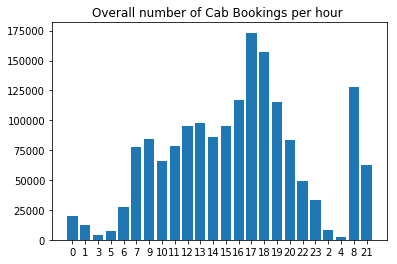

In [14]:
from collections import defaultdict
import matplotlib.pyplot as plt

hourly_total_bookings=defaultdict(float)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][9]
    # Add the total number of bookings to the current value for the hour
    hourly_total_bookings[dates.hour] += num_bookings

# Print hourly_total_bookings
print(hourly_total_bookings)

# Visualize aggregated data
plt.bar(range(len(hourly_total_bookings)), list(hourly_total_bookings.values()), align='center')
plt.xticks(range(len(hourly_total_bookings)), list(hourly_total_bookings.keys()))
plt.title("Overall number of Cab Bookings per hour ")
plt.show()

## Also we can visualise the linearity between RH and other features

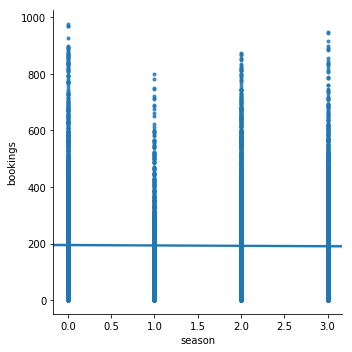

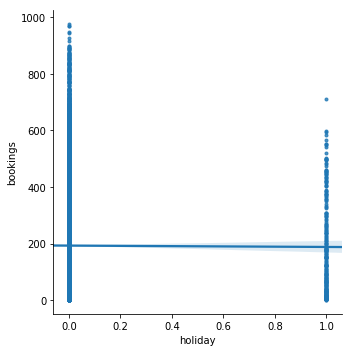

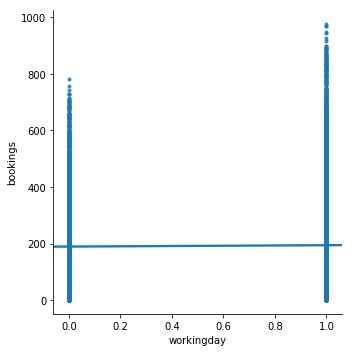

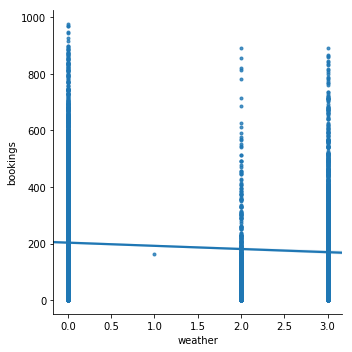

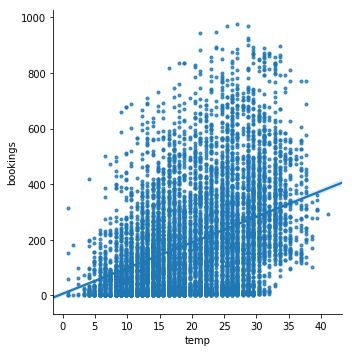

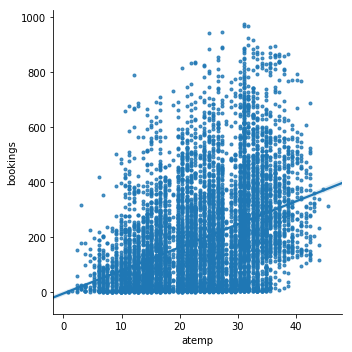

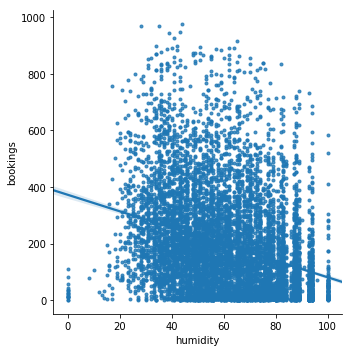

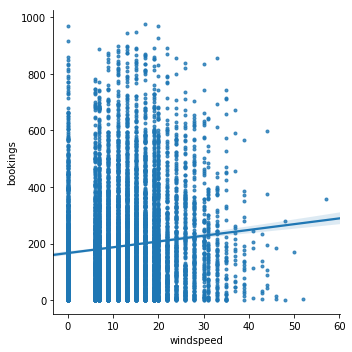

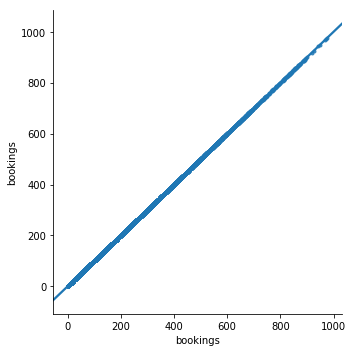

In [15]:
for i in df_train.columns.tolist()[1:]:
    sns.lmplot(x=i,y='bookings',data=df_train,markers='.')

**lets check the correlations between the features.**

In [16]:
df_train.corr()['bookings'].sort_values(ascending=False)

bookings      1.000000
temp          0.397456
atemp         0.392754
windspeed     0.092090
workingday    0.012285
holiday      -0.004391
season       -0.008503
weather      -0.082382
humidity     -0.307982
Name: bookings, dtype: float64

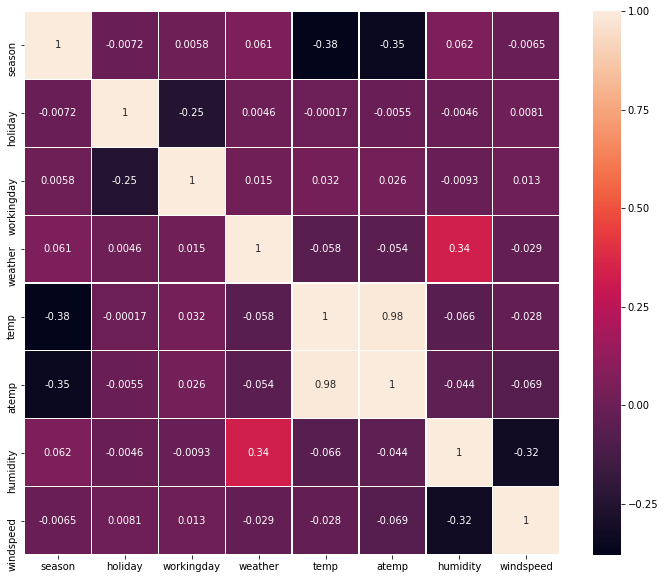

In [17]:
plt.figure(figsize=(12, 10))
df_corr=df_train.drop('bookings',axis=1).corr()
sns.heatmap(df_corr,annot=True,linewidths=0.1)
plt.show()

**Observations:**
   * As we can see that temp and atemp columns are highly correlated. we can drop any one of the coluumns for model predictions.
   * Most of them are columns like 'workingday','weather','holiday','season' are partially correlated, we can use these columns as independent variables.

### Pair Plots

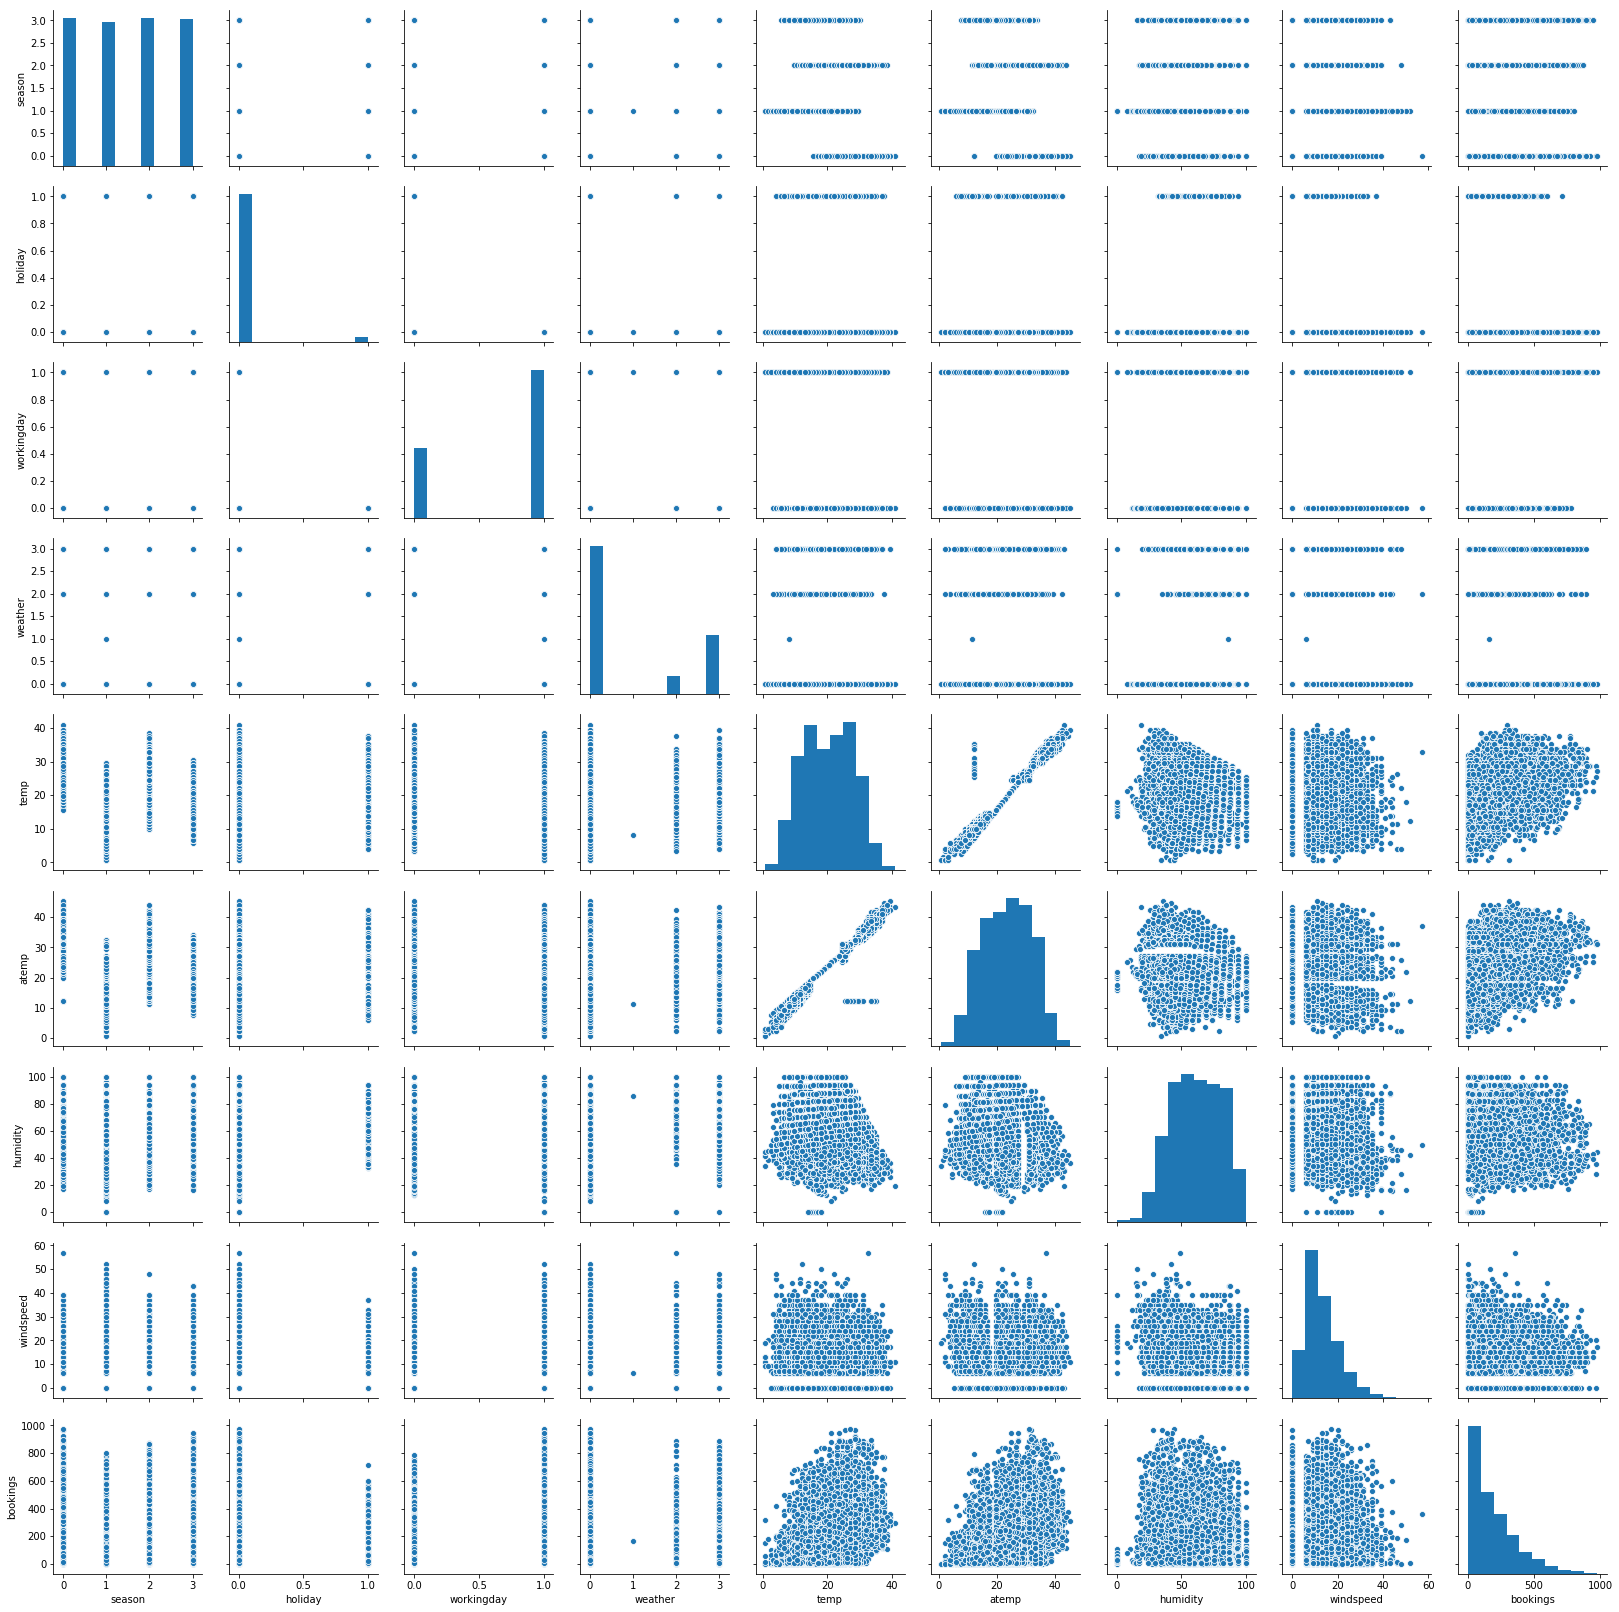

In [18]:
import seaborn as sns
sns.pairplot(df_train)
plt.show()

**Observation:**
 * Pair plots are wonderful mix of scatter plots and bar plots. we can easily visualize the whole  training data with radially can check the multicollinearity between the features.
 * we can visualize the ouliers of each and every columns in the plot and can generalize the features according to it.
 * The diagonal plots(Bar plots) validate the trends of the feature importance comparred to the plot of dependent feature.
 * I have compared the every column with 'bookings' column(dependent feature) and created the scatter plot matrix to validate each and every column below. 

<Figure size 648x504 with 0 Axes>

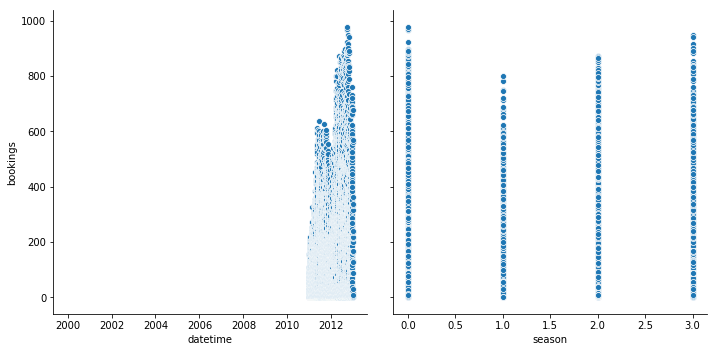

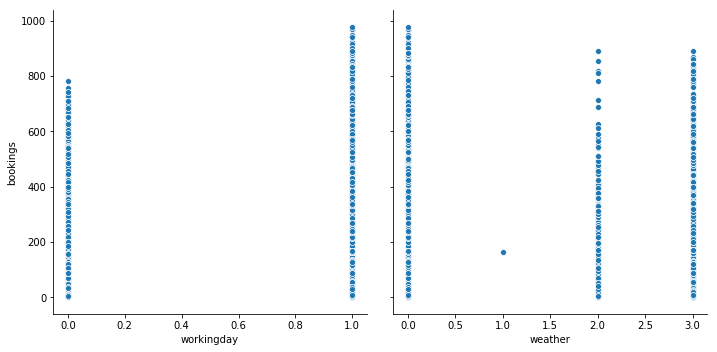

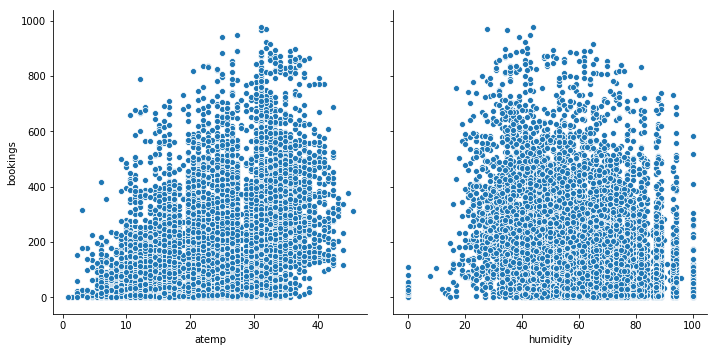

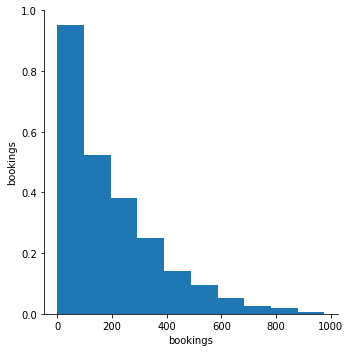

In [19]:
#pair plot with 'bookings' column on y-axis.
plt.figure(figsize=(9,7))
for i in range(0, len(df_train.columns),3):
    sns.pairplot(data=df_train,x_vars=df_train.columns[i:i+2],y_vars=['bookings'],height=5)
plt.show()

**Observations:**
   * We can see somewhat linearity from the scatter plots. Most of the categorical features like 'season','weather','Workingdays' are scattered linearlly.
   * Features like 'atemp', 'humidity' are scattered unpreidictibly.

## Histogram plots

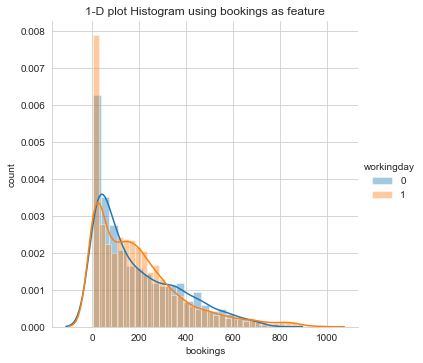

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train,hue='workingday',height=5)\
   .map(sns.distplot,"bookings")\
   .add_legend()
plt.title('1-D plot Histogram using bookings as feature')
plt.ylabel('count')
plt.show()

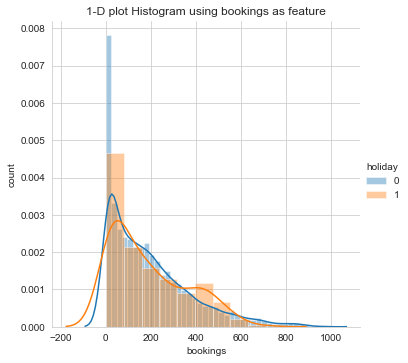

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train,hue='holiday',height=5)\
   .map(sns.distplot,"bookings")\
   .add_legend()
plt.title('1-D plot Histogram using bookings as feature')
plt.ylabel('count')
plt.show()

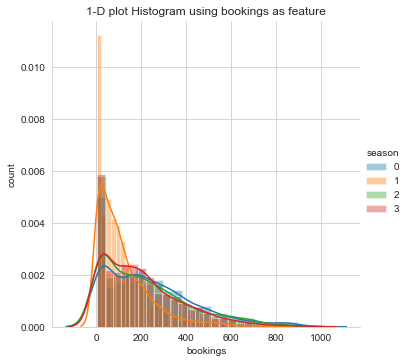

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train,hue='season',height=5)\
   .map(sns.distplot,"bookings")\
   .add_legend()
plt.title('1-D plot Histogram using bookings as feature')
plt.ylabel('count')
plt.show()

**Observations:**
   * Since categorical columns are much linearly scatttered, CDF plots of above features give us the better understanding and visualization with Dependent column.

### Outlier detection

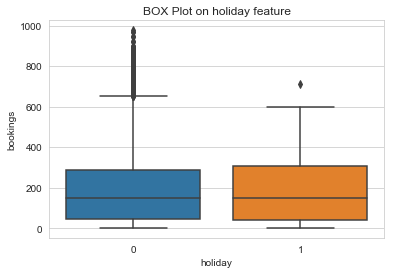

In [24]:
sns.boxplot(x='holiday',y='bookings',data=df_train)
plt.title('BOX Plot on holiday feature')
plt.show()

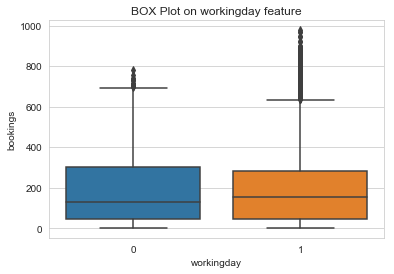

In [25]:
sns.boxplot(x='workingday',y='bookings',data=df_train)
plt.title('BOX Plot on workingday feature')
plt.show()

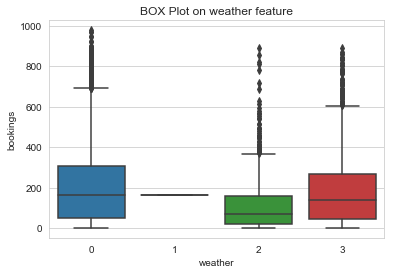

In [26]:
sns.boxplot(x='weather',y='bookings',data=df_train)
plt.title('BOX Plot on weather feature')
plt.show()

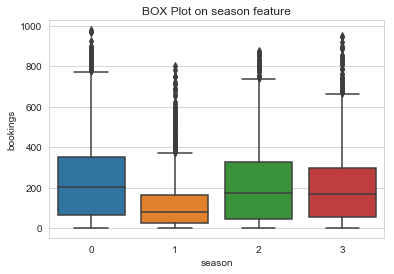

In [27]:
sns.boxplot(x='season',y='bookings',data=df_train)
plt.title('BOX Plot on season feature')
plt.show()

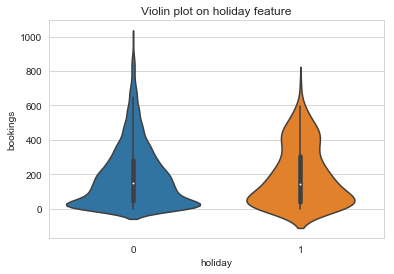

In [28]:
sns.violinplot(x='holiday',y='bookings',data=df_train)
plt.title('Violin plot on holiday feature')
plt.show()

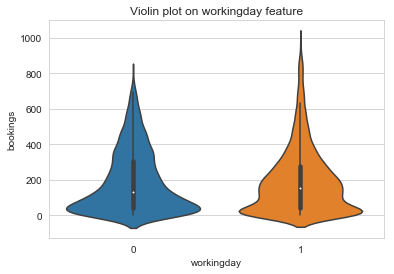

In [29]:
sns.violinplot(x='workingday',y='bookings',data=df_train)
plt.title('Violin plot on workingday feature')
plt.show()

**Observations:**
   * The points outside the wiskers of box plots are outliers.
   * In violin plots the widely spreaded regions are having denser points where as Pointed regions depicts the sparse points.  

**Mathematical Detection of Outliers**

In [30]:
d=df_train.drop('datetime',axis=1)

In [31]:
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range of all the features:')
print(IQR)

Inter Quartile Range of all the features:
season          3.0000
holiday         0.0000
workingday      1.0000
weather         3.0000
temp           12.3000
atemp          14.3950
humidity       31.0000
windspeed       9.9964
bookings      243.0000
dtype: float64


In [32]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [33]:
# removing outliers from the training data. 
s = d[~((d < (Q1 - 1.5 * IQR)) | (d > (Q3 + 1.5 * IQR))).any(axis=1)]
print(s.shape)
s.head()

(8049, 9)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,bookings
7397,1,0,0,0,9.84,14.395,81,0.0000,16
7699,1,0,0,0,9.02,13.635,80,0.0000,40
7785,1,0,0,0,9.84,14.395,75,0.0000,13
5760,1,0,0,3,9.84,12.880,75,6.0032,1
1826,1,0,0,0,9.02,13.635,80,0.0000,2


In [34]:
#bookings columns after ouliers are removed.
t=s['bookings']
print(t.shape)
t.head()

(8049,)


7397    16
7699    40
7785    13
5760     1
1826     2
Name: bookings, dtype: int64

In [35]:
s=s.drop('bookings',axis=1)

In [36]:
s.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
7397,1,0,0,0,9.84,14.395,81,0.0000
7699,1,0,0,0,9.02,13.635,80,0.0000
7785,1,0,0,0,9.84,14.395,75,0.0000
5760,1,0,0,3,9.84,12.880,75,6.0032
1826,1,0,0,0,9.02,13.635,80,0.0000


In [37]:
s.shape #data without outliers

(8049, 8)

In [38]:
d.shape #data with outliers

(8708, 9)

## Machine learning models

In [39]:
#df_train.set_index('datetime',inplace=True)
#df_test.set_index('datetime',inplace=True)

In [40]:
# the training data with outliers.
x_train=df_train
x_test=df_test
y_train=df_trainlabel
y_test=df_testlabel

In [41]:
len(y_test)

2178

In [42]:
# Categorical boolean mask
categorical_feature_mask = x_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = x_train.columns[categorical_feature_mask].tolist()
categorical_feature_mask

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
bookings      False
dtype: bool

In [43]:
x_train=x_train.drop('datetime',axis=1)
x_train=x_train.drop('bookings',axis=1)
x_train=x_train.drop('temp',axis=1) # as it is highly correlated.
print(x_train.shape)
x_train.head()

(8708, 7)


,season,holiday,workingday,weather,atemp,humidity,windspeed
7397,1,0,0,0,14.395,81,0.0000
7699,1,0,0,0,13.635,80,0.0000
7785,1,0,0,0,14.395,75,0.0000
5760,1,0,0,3,12.880,75,6.0032
1826,1,0,0,0,13.635,80,0.0000


In [44]:
x_test=x_test.drop('datetime',axis=1)
x_test=x_test.drop('bookings',axis=1)
x_test=x_test.drop('temp',axis=1)
print(x_test.shape)
x_test.head()

(2178, 7)


,season,holiday,workingday,weather,atemp,humidity,windspeed
1517,1,0,0,0,13.635,80,0.0000
987,1,0,0,0,14.395,75,0.0000
1782,1,0,0,0,14.395,75,0.0000
179,1,0,0,2,20.455,87,12.9980
1232,1,0,0,2,21.970,94,16.9979


In [45]:
#i also tried with data without ouliers.
"""x_train=s
x_test=df_test
y_train=t
y_test=df_testlabel"""

'x_train=s\nx_test=df_test\ny_train=t\ny_test=df_testlabel'

In [46]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [47]:
from sklearn.linear_model import Lasso
lo=Lasso()
lo_model=lo.fit(x_train,y_train)
print('Intercept:',lo_model.intercept_)
print('coeficient:',lo_model.coef_)

y_pred=lo_model.predict(x_test)                      #predict using the model
print(y_pred)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Intercept: [193.00700505]
coeficient: [-2.67740183 -0.71128219 -2.26152465 -0.          0.11086846  1.10066992
 -0.        ]
[198.55131456 198.27457122 198.27457122 ... 187.19391146 187.86212557
 188.62524266]
Baseline RMSE of model: 179.55168819328375


In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)
print('Intercept:',lr_model.intercept_)
print('coeficient:',lr_model.coef_)

y_pred=lr_model.predict(x_test)                      #predict using the model
print(y_pred)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Intercept: [193.00700505]
coeficient: [[-3.45912949 -2.03077763 -3.58082324 -0.56098374  0.8506323   2.19257175
  -0.49761382]]
[[202.39996314]
 [201.90498656]
 [201.90498656]
 ...
 [185.0199001 ]
 [186.60351826]
 [187.53443851]]
Baseline RMSE of model: 179.61998878257353


In [49]:
from sklearn.tree import DecisionTreeRegressor                    
dt_reg=DecisionTreeRegressor()

dt_model=dt_reg.fit(x_train,y_train)         #fit the model
y_pred_dt=dt_model.predict(x_test)
print(y_pred_dt)

print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_test,y_pred_dt)))

[ 94.5 329.  329.  ... 187.   11.  193. ]
RMSE of Decision Tree Regression: 253.77594284058145


In [50]:
from sklearn.svm import SVR          
sv_reg=SVR(gamma='scale',kernel='poly')
sv_model=sv_reg.fit(x_train,y_train)
y_pred_sv=sv_model.predict(x_test)
print(y_pred_sv)
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[147.03852984 146.8524142  146.8524142  ... 148.33867172 147.21818981
 147.35069845]
RMSE of SVR model: 183.5866557220167


In [51]:
from sklearn.model_selection import GridSearchCV
#define rf parameters
svm_params={'C':[1,3],
           'epsilon':[0.1,0.5]}
svm_grid=GridSearchCV(sv_reg,svm_params,cv=10)

svm_model_two=svm_grid.fit(x_train,y_train)

y_pred_svm_two=svm_model_two.predict(x_test)
print(y_pred_svm_two)

print('RMSE using svr grid search method',np.sqrt(mean_squared_error(y_test,y_pred_svm_two)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[147.03852984 146.8524142  146.8524142  ... 148.33867172 147.21818981
 147.35069845]
RMSE using svr grid search method 183.5866557220167


In [52]:
svm_grid.best_params_

{'C': 1, 'epsilon': 0.1}

In [53]:
from sklearn.ensemble import RandomForestRegressor           
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(x_train,y_train) #fit model   
y_pred_rf=rf_model.predict(x_test)
print(y_pred_rf)

#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[ 65.42666667 359.16666667 359.16666667 ... 178.03       214.1
 114.16666667]
RMSE of predicted RH in RF model: 203.34922568493252


In [54]:
from sklearn.model_selection import GridSearchCV
#define rf parameters
rf_params={'n_estimators':[10,20,30,40],
           'max_depth':[8,10,12,14],
           'max_leaf_nodes':[70,90,110,130]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

rf_model_two=rf_grid.fit(x_train,y_train)

y_pred_rf_two=rf_model_two.predict(x_test)
print(y_pred_rf_two)

print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[204.57352432 202.08481622 202.08481622 ... 174.86650038 179.73257476
 186.48359209]
RMSE using RF grid search method 180.44552905155075


In [55]:
rf_grid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 70, 'n_estimators': 40}

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection
clf1 = LinearRegression()
clf2 = SVR(C= 1,epsilon=0.1)
clf3 = DecisionTreeRegressor()
rf = RandomForestRegressor(max_depth=8, max_leaf_nodes=70, n_estimators= 40)

stack = StackingCVRegressor(regressors=(clf1,clf2,clf3,rf),
                            meta_regressor=rf,
                            random_state=42)

print('5-fold cross validation scores:\n')

for clf, label in zip([clf1,clf2,clf3, rf, stack], ['LinearRegression', 'svr', 'decisionTree','Random Forest', 'StackingCVRegressor']):
    scores = model_selection.cross_val_score(clf, x_train , y_train, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: -0.00 (+/- 0.00) [LinearRegression]
R^2 Score: -0.07 (+/- 0.02) [svr]
R^2 Score: -1.07 (+/- 0.16) [decisionTree]
R^2 Score: -0.02 (+/- 0.01) [Random Forest]
R^2 Score: -0.01 (+/- 0.00) [StackingCVRegressor]


In [57]:
stack = StackingCVRegressor(regressors=(clf1,clf2,clf3,rf),
                            meta_regressor=rf,
                            random_state=42)

print('5-fold cross validation scores:\n')

for clf, label in zip([clf1,clf2,clf3, rf, stack], ['LinearRegression', 'svr', 'decisionTree','Random Forest', 'StackingCVRegressor']):
    scores = model_selection.cross_val_score(clf, x_train , y_train, cv=5,scoring='neg_mean_squared_error')
    print("RMSE Score: %0.2f (+/- %0.2f) [%s]" % (np.sqrt(abs(scores.mean())), np.sqrt(abs(scores.std())), label))

5-fold cross validation scores:

RMSE Score: 181.67 (+/- 43.65) [LinearRegression]
RMSE Score: 187.43 (+/- 48.20) [svr]
RMSE Score: 262.09 (+/- 42.38) [decisionTree]
RMSE Score: 183.23 (+/- 44.66) [Random Forest]
RMSE Score: 182.49 (+/- 44.11) [StackingCVRegressor]


## Conclusion:

Below are the models used for predicting Total Cab Bookings.
When tested on validation data below are RMSE obtained from different algorithms:

In [57]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['model','RMSE']
x.add_row(['Lasso',179.55])
x.add_row(['Linear Regression',179.60])
x.add_row(['Decision Tree',247.35])
x.add_row(['SVM',183.61])
x.add_row(['SVM GridsearchCV',183.60])
x.add_row(['Random Forest',203.55])
x.add_row(['Random Forest GridsearchCV',180.33])
print(x)

+----------------------------+--------+
|           model            |  RMSE  |
+----------------------------+--------+
|           Lasso            | 179.55 |
|     Linear Regression      | 179.6  |
|       Decision Tree        | 247.35 |
|            SVM             | 183.61 |
|      SVM GridsearchCV      | 183.6  |
|       Random Forest        | 203.55 |
| Random Forest GridsearchCV | 180.33 |
+----------------------------+--------+
